In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt 

In [2]:
data=pd.read_csv("E:\\zindi comp\\COVID-19 Tweet Classification Challenge by #ZindiWeekendz\\updated_train.csv")

In [3]:
data.head()

,ID,text,target
0,train_0,The bitcoin halving is cancelled due to,1
1,train_1,MercyOfAllah In good times wrapped in its gran...,0
2,train_2,266 Days No Digital India No Murder of e learn...,1
3,train_3,India is likely to run out of the remaining RN...,1
4,train_4,In these tough times the best way to grow is t...,0


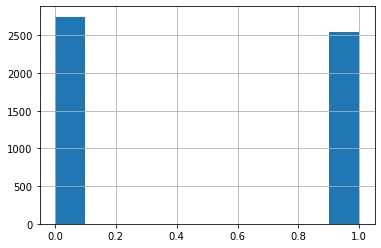

In [4]:
data.target.hist()

In [5]:
data.tail()

,ID,text,target
5282,train_6856,The spread of the novel among asylum seekers o...,1
5283,train_6857,Hundreds of Jewish patients are being treated...,1
5284,train_6858,Beats me Honestly most of the people I follow ...,0
5285,train_6859,Help us reach more people by donating and shar...,0
5286,train_6860,Interest Rate Swap Derivative Pricing in Pytho...,0


In [6]:
data.isnull().any()

ID        False
text      False
target    False
dtype: bool

In [7]:
data['target'].unique()

array([1, 0], dtype=int64)

In [8]:
data.shape

(5287, 3)

In [9]:
tdata=pd.read_csv("E:\\zindi comp\\COVID-19 Tweet Classification Challenge by #ZindiWeekendz\\updated_test.csv")

In [10]:
tdata.shape

(1962, 2)

In [11]:
tdata.tail()

,ID,text
1957,test_2932,Fageeru meehaa geyga Bandah PUBLIC fundS amp G...
1958,test_2934,DFFN Diffusion Pharmaceuticals Announces Pre I...
1959,test_2936,I want to wish the Muslim members of Congress ...
1960,test_2937,You mean you don t believe there is a conspira...
1961,test_2940,Rajavi We call on the United Nations and the S...


In [12]:
fdata=data.append(tdata,sort=False)

In [13]:
fdata.tail()

,ID,text,target
1957,test_2932,Fageeru meehaa geyga Bandah PUBLIC fundS amp G...,NaN
1958,test_2934,DFFN Diffusion Pharmaceuticals Announces Pre I...,NaN
1959,test_2936,I want to wish the Muslim members of Congress ...,NaN
1960,test_2937,You mean you don t believe there is a conspira...,NaN
1961,test_2940,Rajavi We call on the United Nations and the S...,NaN


In [14]:
fdata.reset_index(inplace=True)

In [15]:
fdata.tail()

,index,ID,text,target
7244,1957,test_2932,Fageeru meehaa geyga Bandah PUBLIC fundS amp G...,NaN
7245,1958,test_2934,DFFN Diffusion Pharmaceuticals Announces Pre I...,NaN
7246,1959,test_2936,I want to wish the Muslim members of Congress ...,NaN
7247,1960,test_2937,You mean you don t believe there is a conspira...,NaN
7248,1961,test_2940,Rajavi We call on the United Nations and the S...,NaN


In [16]:
import re
import nltk
nltk.download('stopwords') #contain irrelvant words  & ava in diff lang
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = [] #corpus collection of strings
for i in range(0,7249):
    review = re.sub('[^a-zA-Z]', ' ', str(fdata['text'][i])) #remove  except a-z & A-Z & create space b/w words
    review = review.lower() #capital to lower
    review = review.split()  #sentence to words
    ps = PorterStemmer()  # loved to love (diff kind of same word into standard word)
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))] #take words not in stopward
    review = ' '.join(review) #again to string sep by space
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 9000)
X = cv.fit_transform(corpus).toarray()
y = data['target']

In [18]:
X.shape

(7249, 9000)

In [23]:
xtrain=X[0:5287]
xtest=X[5287:]

In [24]:
ytrain=data.target

In [25]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [30]:
y_pred = classifier.predict_proba(xtest)

In [31]:
sub=pd.read_csv("E:\\zindi comp\\COVID-19 Tweet Classification Challenge by #ZindiWeekendz\\updated_ss.csv")
sub['target']=y_pred
sub.to_csv("rf100.csv",index=False)